**Arboles de decision**


**Importacion de librerias**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn. metrics import accuracy_score

**Importacion de la informacion**

In [5]:
Data = pd.read_csv ('winequality-red.csv')

**1. Analisis exploratorio**

In [156]:
Data.head(1599)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
Data.shape 

(1599, 12)

In [29]:
Data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**2. Procesamiento de datos verificando valores nulos**

In [31]:
Data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**3. Caracteristicas mas relevantes**
**Para este ejercicio se toman dos variables relevantes, la relacion entre alcohol y densidad, Podría haber una relación inversa entre el contenido de alcohol y la densidad. Los vinos con un mayor contenido de alcohol tienden a tener una densidad más baja.**

In [142]:
predictors_col = ['alcohol', 'density' ]
target_col = ['quality']

In [143]:
predictors = Data[predictors_col]
target = Data[target_col]

In [144]:
predictors

,alcohol,density
0,9.4,0.99780
1,9.8,0.99680
2,9.8,0.99700
3,9.8,0.99800
4,9.4,0.99780
...,...,...
1594,10.5,0.99490
1595,11.2,0.99512
1596,11.0,0.99574
1597,10.2,0.99547


In [145]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [134]:
corr = predictors.corr()
corr

,alcohol,density
alcohol,1.00000,-0.49618
density,-0.49618,1.00000


**4. Didvidir los datos, Test - Train**

In [146]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

**Creamos la instancia para el modelo de arbol de decision**

In [147]:
tree = DecisionTreeClassifier()

**5. Entrenamiento del modelo**

In [148]:
arbol = tree.fit(x_train, y_train)

[Text(0.5785911897937739, 0.9821428571428571, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.3160111399671952, 0.9464285714285714, 'x[0] <= 9.925\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.11464598141060689, 0.9107142857142857, 'x[1] <= 0.997\ngini = 0.492\nsamples = 539\nvalue = [4, 20, 350, 157, 8, 0]'),
 Text(0.044662383816293054, 0.875, 'x[0] <= 9.65\ngini = 0.383\nsamples = 163\nvalue = [1, 7, 124, 31, 0, 0]'),
 Text(0.012916894477856752, 0.8392857142857143, 'x[0] <= 9.15\ngini = 0.317\nsamples = 107\nvalue = [0, 5, 87, 15, 0, 0]'),
 Text(0.0065609622744669215, 0.8035714285714286, 'x[0] <= 9.075\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2, 0, 0]'),
 Text(0.004373974849644614, 0.7678571428571429, 'x[0] <= 9.025\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.002186987424822307, 0.7321428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.0065609622744669215, 0.732

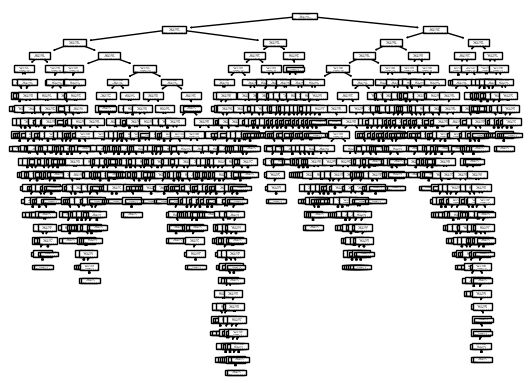

In [149]:
plot_tree(arbol)

In [154]:
predicciones = arbol.predict(x_test)

In [152]:
predicciones

array([7, 6, 5, 5, 6, 5, 7, 7, 5, 6, 5, 6, 5, 6, 7, 5, 6, 4, 5, 7, 5, 6,
       6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 7, 5, 6, 5, 5, 6, 5, 7, 5, 5, 7, 6, 5, 5, 5, 5, 5, 6, 7,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6,
       4, 8, 5, 6, 5, 5, 7, 7, 6, 5, 6, 5, 6, 7, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 6, 5, 7, 5, 6, 7, 6, 5, 5, 5, 7, 6, 6, 4, 5, 5, 5, 7, 5, 5,
       5, 4, 6, 6, 6, 5, 5, 5, 7, 5, 7, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 6, 6,
       5, 5, 6, 6, 4, 6, 6, 5, 6, 6, 7, 6, 7, 5, 5, 6, 7, 5, 6, 7, 5, 6,
       5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 6, 3, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 5, 5, 4, 6, 5, 5, 5, 6, 7, 5, 5, 5, 4, 6, 7, 4, 5,
       6, 5, 6, 7, 5, 5, 5, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 7, 5, 5, 7, 6, 5, 4, 5, 5, 6, 5, 5, 5, 5,

In [153]:
pd.crosstab(np.array([y[0]for y in y_test.values.tolist()]), predicciones, rownames = ['Actual'], colnames = ['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,2,2,4,0,0
5,1,3,108,27,7,0
6,0,4,33,71,15,1
7,0,1,4,14,16,0
8,0,0,3,2,1,0


In [129]:
accuracy = accuracy_score(y_test,predicciones) 
accuracy

0.5875

**6. Evaluar el modelo**

In [165]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", precision)
print("Recall del modelo:", recall)
print("F1-score del modelo:", f1)
print("Exactitud del modelo:", exactitud)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Precisión del modelo: 0.6095692738633914
Recall del modelo: 0.615625
F1-score del modelo: 0.612232371260149
Exactitud del modelo: 0.615625


**7.Graficas de dispersion - grafica de calidad del vino**

<Axes: xlabel='alcohol', ylabel='density'>

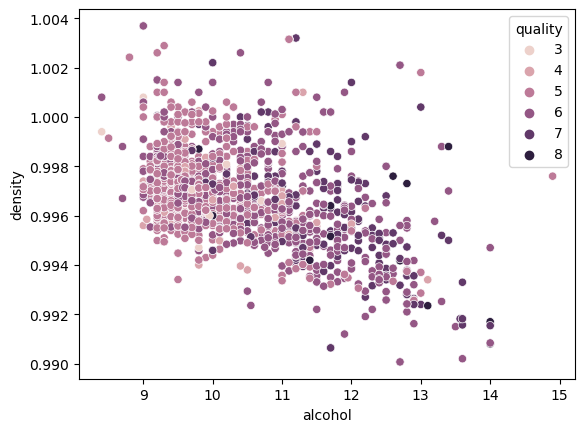

In [157]:
sns.scatterplot(x = "alcohol", y = "density", hue = "quality", data = Data)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

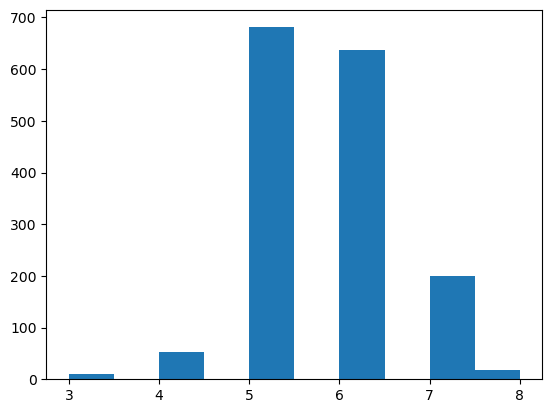

In [158]:
plt.hist(Data.quality)

**8. Interpretacion de los datos**

*Podemos observar que de 0 a 100 de los datos de los vinos analisados se encuentran en un rango donde la calidad  va de 3 a 4.
los vinoscon calidad de 5 a 6 se evidencian entre 600 a 700.
200 datos evaluados para calidad 7 y de 0 a 100 para calidad 8.
**Con los datos anteriormente analisados con respecto a la variable de calidad podemos entender que la mayoria de los vinos son calidad 5 y 6**
*En la relacion generada en el diagrama de dispersion podemos observar que a menor grado de alcohol mayor densidad y menor calidad de vino. como se puede ver en la imagen del diagrama en base a la relacion generada los vinos con calidad 5-6-7-8 tienen un grado de alcohol mayor a 10**


*En las predicciones despues del entrenamiento del modelonos da a entender que el modelo no fue 100% exacto,
La diagonal principal de la matriz de confusión contiene los valores de predicciones correctas, mientras que los valores fuera de la diagonal principal son predicciones incorrectas.
Ejemplo: La celda en la fila 4, columna 5 intersección de la clase 'Actual' 4 y la clase Predicciones 5 tiene un valor de 2, 
lo que significa que el modelo predijo incorrectamente 2 instancias de la clase 4 como pertenecientes a la clase 5.*
*La celda en la fila 5, columna 5 (intersección de la clase "Actual" 5 y la clase "Predicciones" 5) tiene un valor de 108, lo que significa que el modelo predijo correctamente 108 instancias de la clase 5.*

**Precisión del modelo:** La precisión del modelo es la proporción de predicciones correctas (verdaderos positivos más verdaderos negativos) 
sobre el total de predicciones realizadas por el modelo. En este caso, 
la precisión del modelo es aproximadamente 0.6095, lo que significa que alrededor del 60.95% de las predicciones del modelo fueron correctas.

**Recall del modelo:** El recall del modelo, también conocido como tasa de verdaderos positivos o sensibilidad, es la proporción de instancias positivas que fueron correctamente clasificadas por el modelo. En este caso, el recall del modelo es aproximadamente 0.6156, lo que significa que alrededor del 61.56% de las instancias positivas fueron identificadas correctamente por el modelo.

**F1-score del modelo:** El F1-score es la media armónica de precisión y recall del modelo. Es una métrica que tiene en cuenta tanto la precisión como el recall del modelo. En este caso, el F1-score del modelo es aproximadamente 0.6122.

**Exactitud del modelo:** La exactitud del modelo es simplemente la proporción de predicciones correctas sobre el total de instancias en el conjunto de datos. En este caso, la exactitud del modelo es aproximadamente 0.6156, lo que significa que alrededor del 61.56% de todas las instancias en el conjunto de datos fueron clasificadas correctamente por el modelo.

